<a href="https://colab.research.google.com/github/kishore-n-george/tabular-llm-comparison/blob/main/Dataset_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#python3 -m venv tabular
#!pip install jupyter numpy pandas scikit-learn xgboost torch transformers shap scikit-learn seaborn matplotlib ucimlrepo xgboost tabpfn rtdl torch 
# torchvision torchaudio
# ft_transformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, dotdict
from sklearn.metrics import mean_squared_error, r2_score, precision_score, classification_report, recall_score, mean_squared_error, accuracy_score, f1_score, roc_auc_score
import time
from sklearn.model_selection import train_test_split
import xgboost as xgb
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from rtdl import FTTransformer
import shap

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Set up configurations for consistent plotting
sns.set(style="whitegrid")

/home/ec2-user/tabular/lib/python3.11/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Dataset Shape: (17379, 17)
Column Names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
First 5 Rows:
    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.

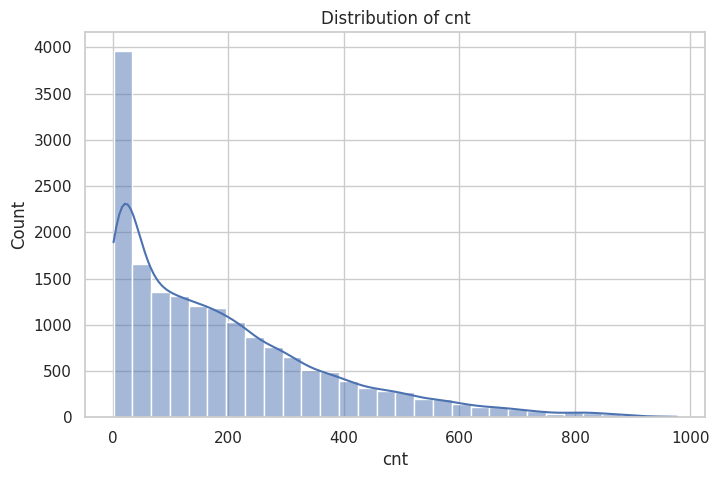

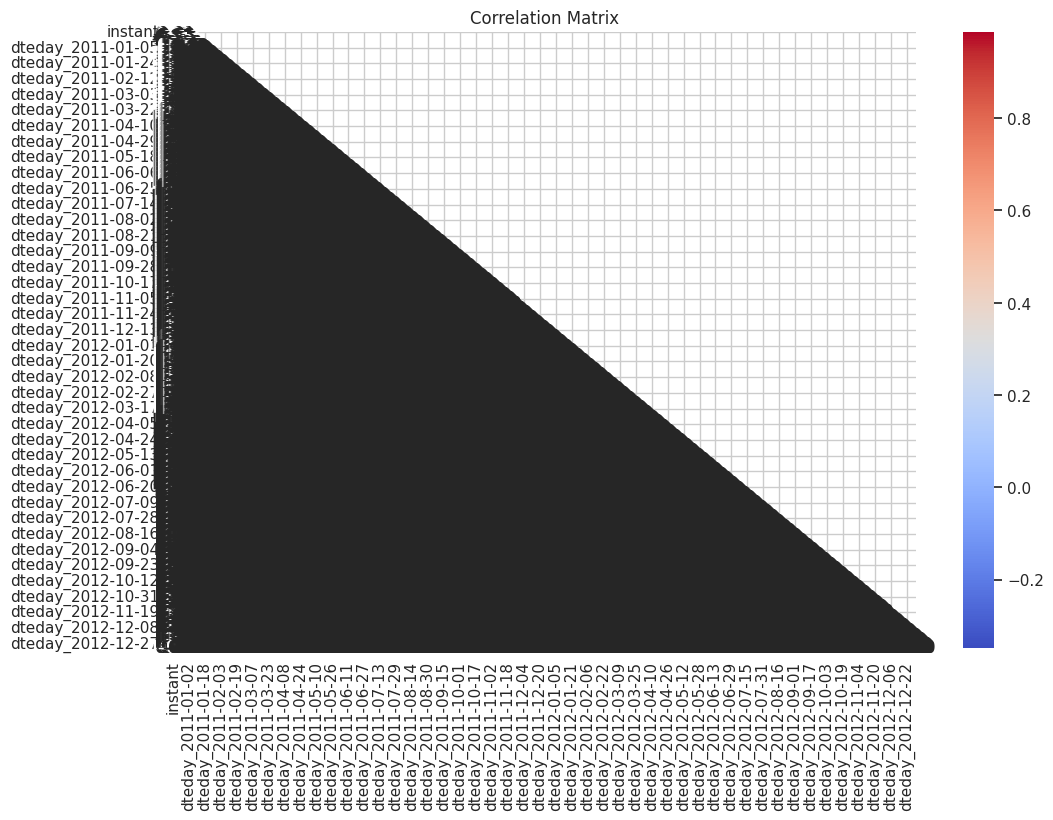

Data preparation and EDA for Bike Sharing dataset completed.


In [4]:

bike_sharing_dataset = fetch_ucirepo(id=275)
# Load Bike Sharing dataset
original_df = bike_sharing_dataset.data.original

# Basic dataset information
print("Dataset Shape:", original_df.shape)
print("Column Names:", original_df.columns.tolist())
print("First 5 Rows:\n", original_df.head())

# Check for missing values
print("Missing Values:\n", original_df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:\n", original_df.describe().T)

# Define target and feature columns
target_column = "cnt"  # Replace with actual target column if different
features = original_df.drop(columns=[target_column])

# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns.tolist()

# One-hot encoding for categorical features
original_df = pd.get_dummies(original_df, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
original_df[numerical_cols] = scaler.fit_transform(original_df[numerical_cols])

# EDA - Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[target_column], kde=True, bins=30)
plt.title(f"Distribution of {target_column}")
plt.show()

# EDA - Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = original_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr))
plt.title("Correlation Matrix")
plt.show()

print("Data preparation and EDA for Bike Sharing dataset completed.")


XGBoost Reference implementation

In [5]:
# Load Bike Sharing Dataset
bike_sharing = original_df
print(bike_sharing)

# Preprocessing
# Assuming the dataset has columns like 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'
X_bike = bike_sharing.drop('cnt', axis=1)
y_bike = bike_sharing['cnt']

# Split the data
X_train_bike, X_test_bike, y_train_bike, y_test_bike = train_test_split(X_bike, y_bike, test_size=0.2, random_state=42)

        instant    season        yr      mnth        hr   holiday   weekday  \
0     -1.731951 -1.356634 -1.005134 -1.610438 -1.670004 -0.172112  1.493891   
1     -1.731752 -1.356634 -1.005134 -1.610438 -1.525374 -0.172112  1.493891   
2     -1.731552 -1.356634 -1.005134 -1.610438 -1.380744 -0.172112  1.493891   
3     -1.731353 -1.356634 -1.005134 -1.610438 -1.236115 -0.172112  1.493891   
4     -1.731154 -1.356634 -1.005134 -1.610438 -1.091485 -0.172112  1.493891   
...         ...       ...       ...       ...       ...       ...       ...   
17374  1.731154 -1.356634  0.994892  1.588467  1.077962 -0.172112 -0.998987   
17375  1.731353 -1.356634  0.994892  1.588467  1.222591 -0.172112 -0.998987   
17376  1.731552 -1.356634  0.994892  1.588467  1.367221 -0.172112 -0.998987   
17377  1.731752 -1.356634  0.994892  1.588467  1.511851 -0.172112 -0.998987   
17378  1.731951 -1.356634  0.994892  1.588467  1.656481 -0.172112 -0.998987   

       workingday  weathersit      temp  ...  dteda

In [7]:
# Bike Sharing Dataset
xgb_reg_bike = xgb.XGBRegressor(objective='reg:squarederror')
start_time = time.time()
xgb_reg_bike.fit(X_train_bike, y_train_bike)
xgb_train_time = time.time() - start_time

# Predictions for XGBoost
start_time = time.time()
xgb_y_pred_bike = xgb_reg_bike.predict(X_test_bike)
xgb_inference_time = time.time() - start_time



TabPFN Classifier